# ConnectTel Customer Churn Prediction
ConnectTel is a leading telecommunications company at the forefront of innovation and connectivity solutions. With a strong presence in the global market, ConnectTel has established itself as a trusted provider of reliable voice, data, and Internet services. Offering a comprehensive range of telecommunications solutions, including mobile networks,
broadband connections, and enterprise solutions.

## Problem Definition
ConnectTel Telecom Company faces the pressing need to address customer churn, which poses a significant threat to its business sustainability and growth.
The company's current customer retention strategies lack precision and effectiveness, resulting in the loss of valuable customers to competitors.

To overcome this challenge, ConnectTel aims to develop a robust customer churn prediction system for which I was contacted to handle as a Data Scientist. By leveraging advanced analytics and machine learning techniques on available customer data, the company seeks to accurately forecast customer churn and implement targeted retention initiatives.

This proactive approach will enable ConnectTel to reduce customer attrition, enhance customer loyalty, and maintain a competitive edge in the highly dynamic and competitive telecommunications industry.

In [1]:
#Data analysis libraries
import pandas as pd
import numpy as np
from collections import Counter

#Data visualization libraries
import seaborn as sb
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [59]:
#Load the dataset

data = pd.read_csv('Customer-Churn.csv')

In [60]:
# View the top rows

data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# View the bottom rows

data.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [5]:
# Check the dimensionality of the data - The number of rows and columns

data.shape

(7043, 21)

In [6]:
# Examining the column/features of the data

data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
# Investigating the dataset for anomalies and data types

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
#Converting the total charges column from object to float
data['TotalCharges'] = data['TotalCharges'].replace('[^0-9]+', 0, regex=True)
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'])

data['TotalCharges'] = data['TotalCharges'].astype(float)

In [9]:
data.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,0.0,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,0.0,No


In [10]:
print(data.dtypes)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


In [11]:
# Numerical statistical analysis

data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,106.908562
std,0.368612,24.559481,30.090047,681.259695
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,0.000000
50%,0.000000,29.000000,70.350000,0.000000
75%,0.000000,55.000000,89.850000,0.000000
max,1.000000,72.000000,118.750000,8405.000000


In [12]:
# Categorical statistical analysis

data.describe(include=(["object", "bool"])).T

,count,unique,top,freq
customerID,7043,7043,7590-VHVEG,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


In [13]:
# Investigating missing data

null_vals = data.isnull().sum()
null_vals

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Observation:
There are no missing values in the dataset

In [14]:
data.duplicated().sum()

0

### Observation:
There are no duplicates in the dataset

## EXPLORATORY DATA ANALYSIS
- Explore data
- Carry out Univariate, Bivariate and Multivariate visualization analysis

In [15]:
# Group customer by tenure as customer type

def tenure_group(x):
    if x <= 20:
        return "0 - 20 Newcomers"
    elif x <= 40:
        return "21 - 40 Loyalists"
    elif x <= 60:
        return "41 - 60 Champions"
    else:
        return "61 - 80 Legends"
    
#Apply function to the data
data["CustomerType"] = data["tenure"].apply(tenure_group)
data.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,CustomerType
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,0.0,No,0 - 20 Newcomers
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,0.0,No,21 - 40 Loyalists


## Univariate Analysis

In [16]:
#function that calculates and adds pecentage to graph plots
def perc_plot(plot,feature):
  total = len(feature)
  for p in plot.patches:
    perc = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2 - 0.05
    y = p.get_y() + p.get_height()
    ax.annotate(perc,(x,y), size=12)
  plt.show()

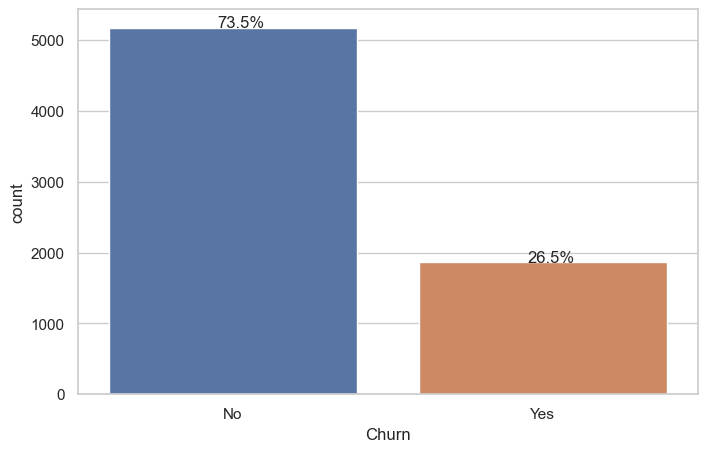

In [17]:
#distribution of target feature
sb.set_theme(style="whitegrid")
plt.figure(figsize=(8,5))
ax = sb.countplot(x='Churn',data=data);
perc_plot(ax,data['Churn'])

### Observation:
The chart above indicate that 26.5% of ConnectTel customers have churned.

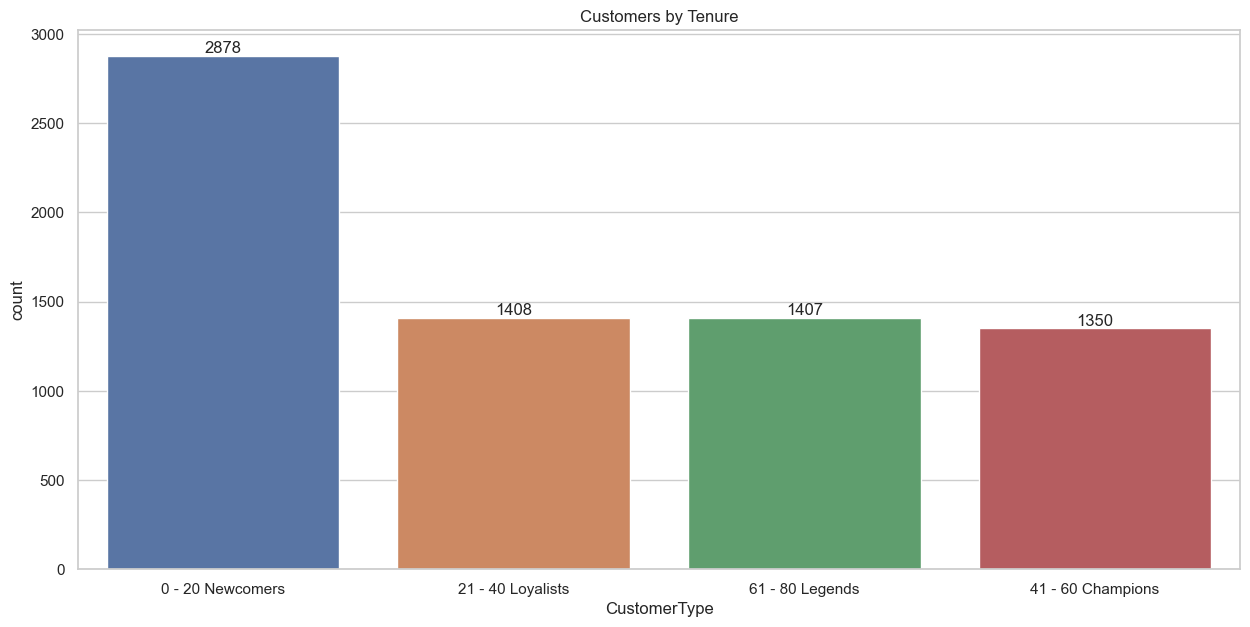

In [18]:
# Customer type analysis

plt.figure(figsize=(15,7))
plt.title("Customers by Tenure")
ax = sb.countplot(data=data, x='CustomerType', order=data['CustomerType'].value_counts().index)

abs_values = data['CustomerType'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values);

### Observation
Majority of ConnectTel cutomers are newcomers that is the customers that joined 0 - 20 months ago, followed by the loyalist, which are the customers that joined 21 - 40 months ago

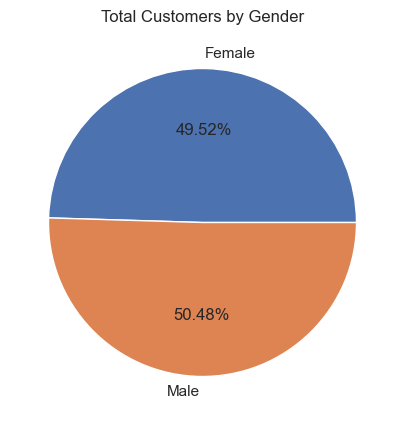

Male      3555
Female    3488
Name: gender, dtype: int64

In [19]:
# Total customers by gender

fig,ax = plt.subplots(figsize=(5,5))
count = Counter(data["gender"])
ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f'{p:.2f}%')
ax.set_title("Total Customers by Gender")
plt.show();
data["gender"].value_counts()

### Observation:
Majority of ConnectTel customers are male with 50.48%

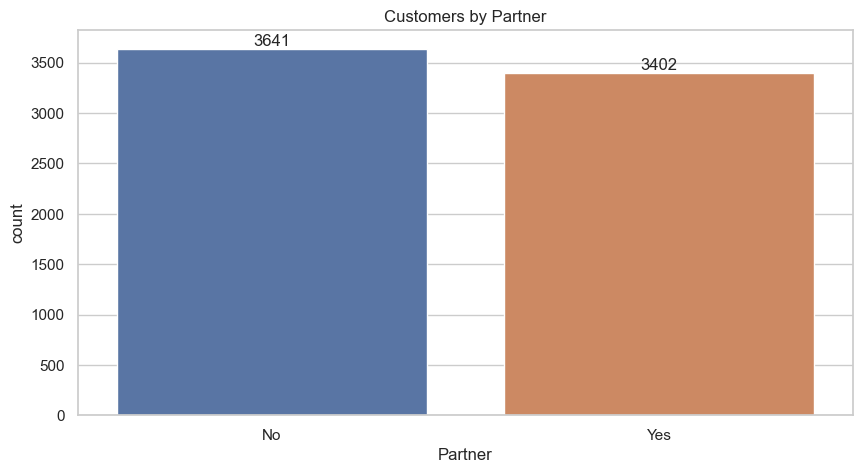

In [20]:
# Customer partner analysis

plt.figure(figsize=(10,5))
plt.title("Customers by Partner")
ax = sb.countplot(data=data, x='Partner', order=data['Partner'].value_counts().index)

abs_values = data['Partner'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values);

### Observation
More than half of ConnectTel customers have no partners.

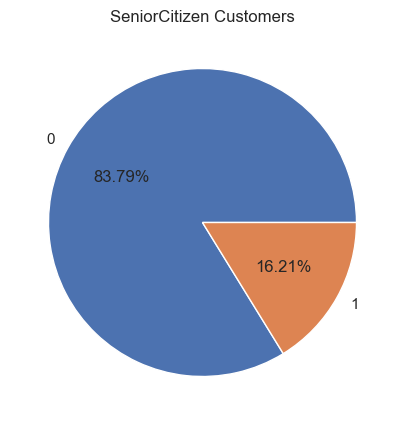

In [21]:
# Analysis of SeniorCitizen

fig,ax = plt.subplots(figsize=(5,5))
count = Counter(data["SeniorCitizen"])
ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f'{p:.2f}%')
ax.set_title("SeniorCitizen Customers")
plt.show();

### Observation:
Only 16.21% of ConnectTel customers are senior citizens

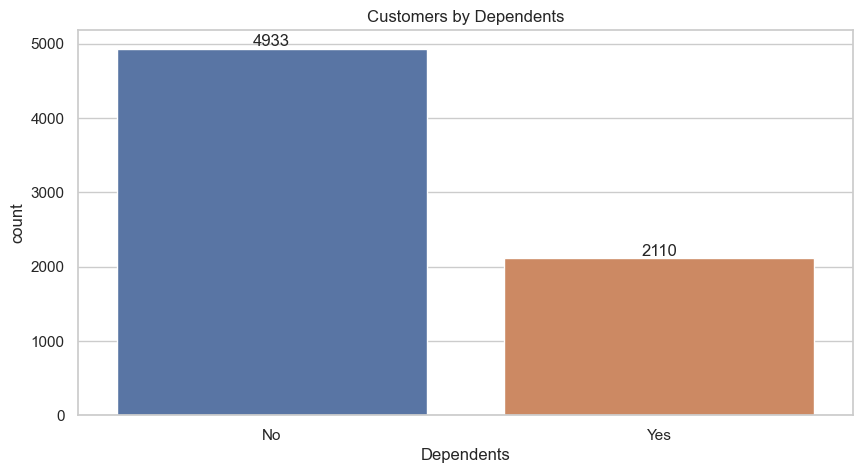

In [22]:
# Customer Denpendent analysis

plt.figure(figsize=(10,5))
plt.title("Customers by Dependents")
ax = sb.countplot(data=data, x='Dependents', order=data['Dependents'].value_counts().index)

abs_values = data['Dependents'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values);

### Observation
About 4933 of ConnectTel customers have no dependents.

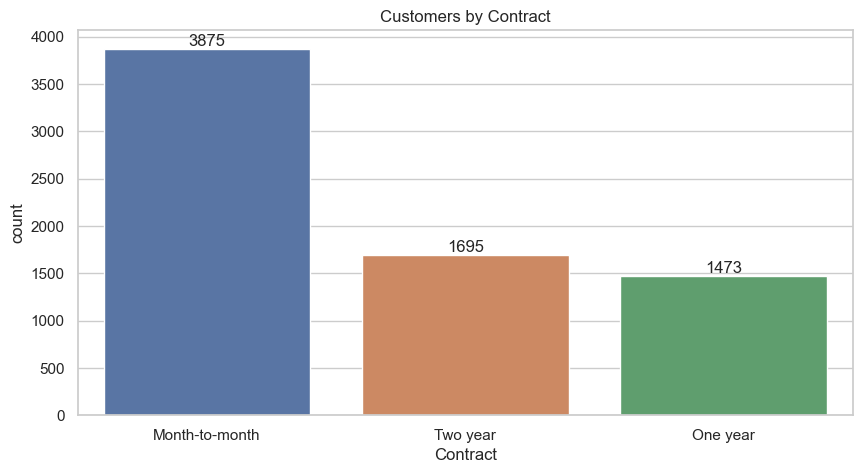

In [23]:
# Customer contract analysis

plt.figure(figsize=(10,5))
plt.title("Customers by Contract")
ax = sb.countplot(data=data, x='Contract', order=data['Contract'].value_counts().index)

abs_values = data['Contract'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values);

### Observation:
Majority of ConnectTel customers have Month-to-Month contract, followed by customers with Two year contract

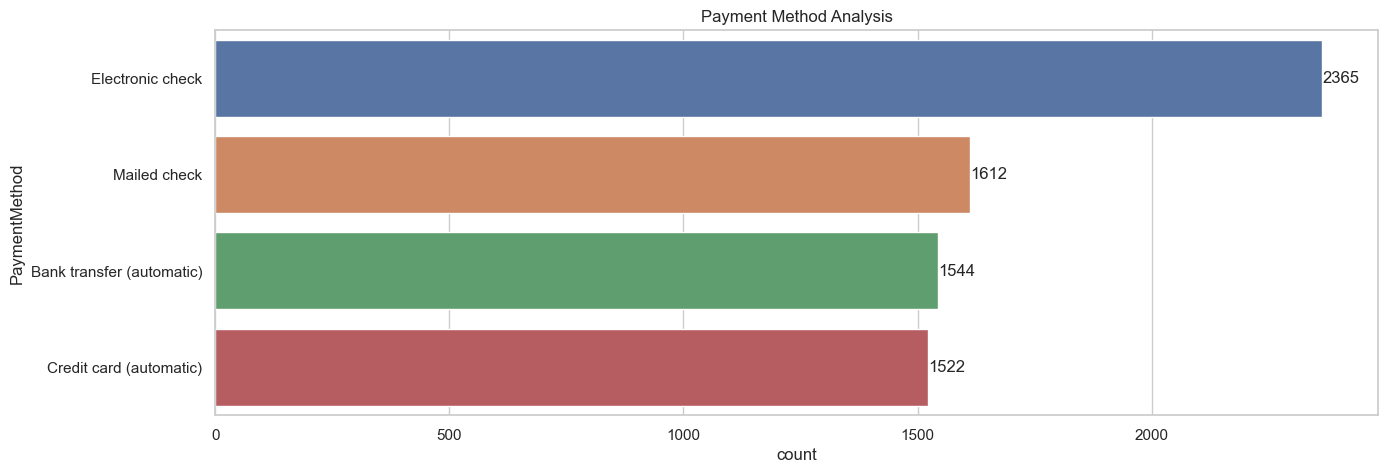

In [24]:
# Payment method analysis


plt.figure(figsize=(15,5))
plt.title("Payment Method Analysis")
ax = sb.countplot(data=data, y='PaymentMethod', order=data['PaymentMethod'].value_counts().index)

abs_values = data['PaymentMethod'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values);

### Observation
The most payment method used by ConnectTel customer is the Electronic check, followed Mail check

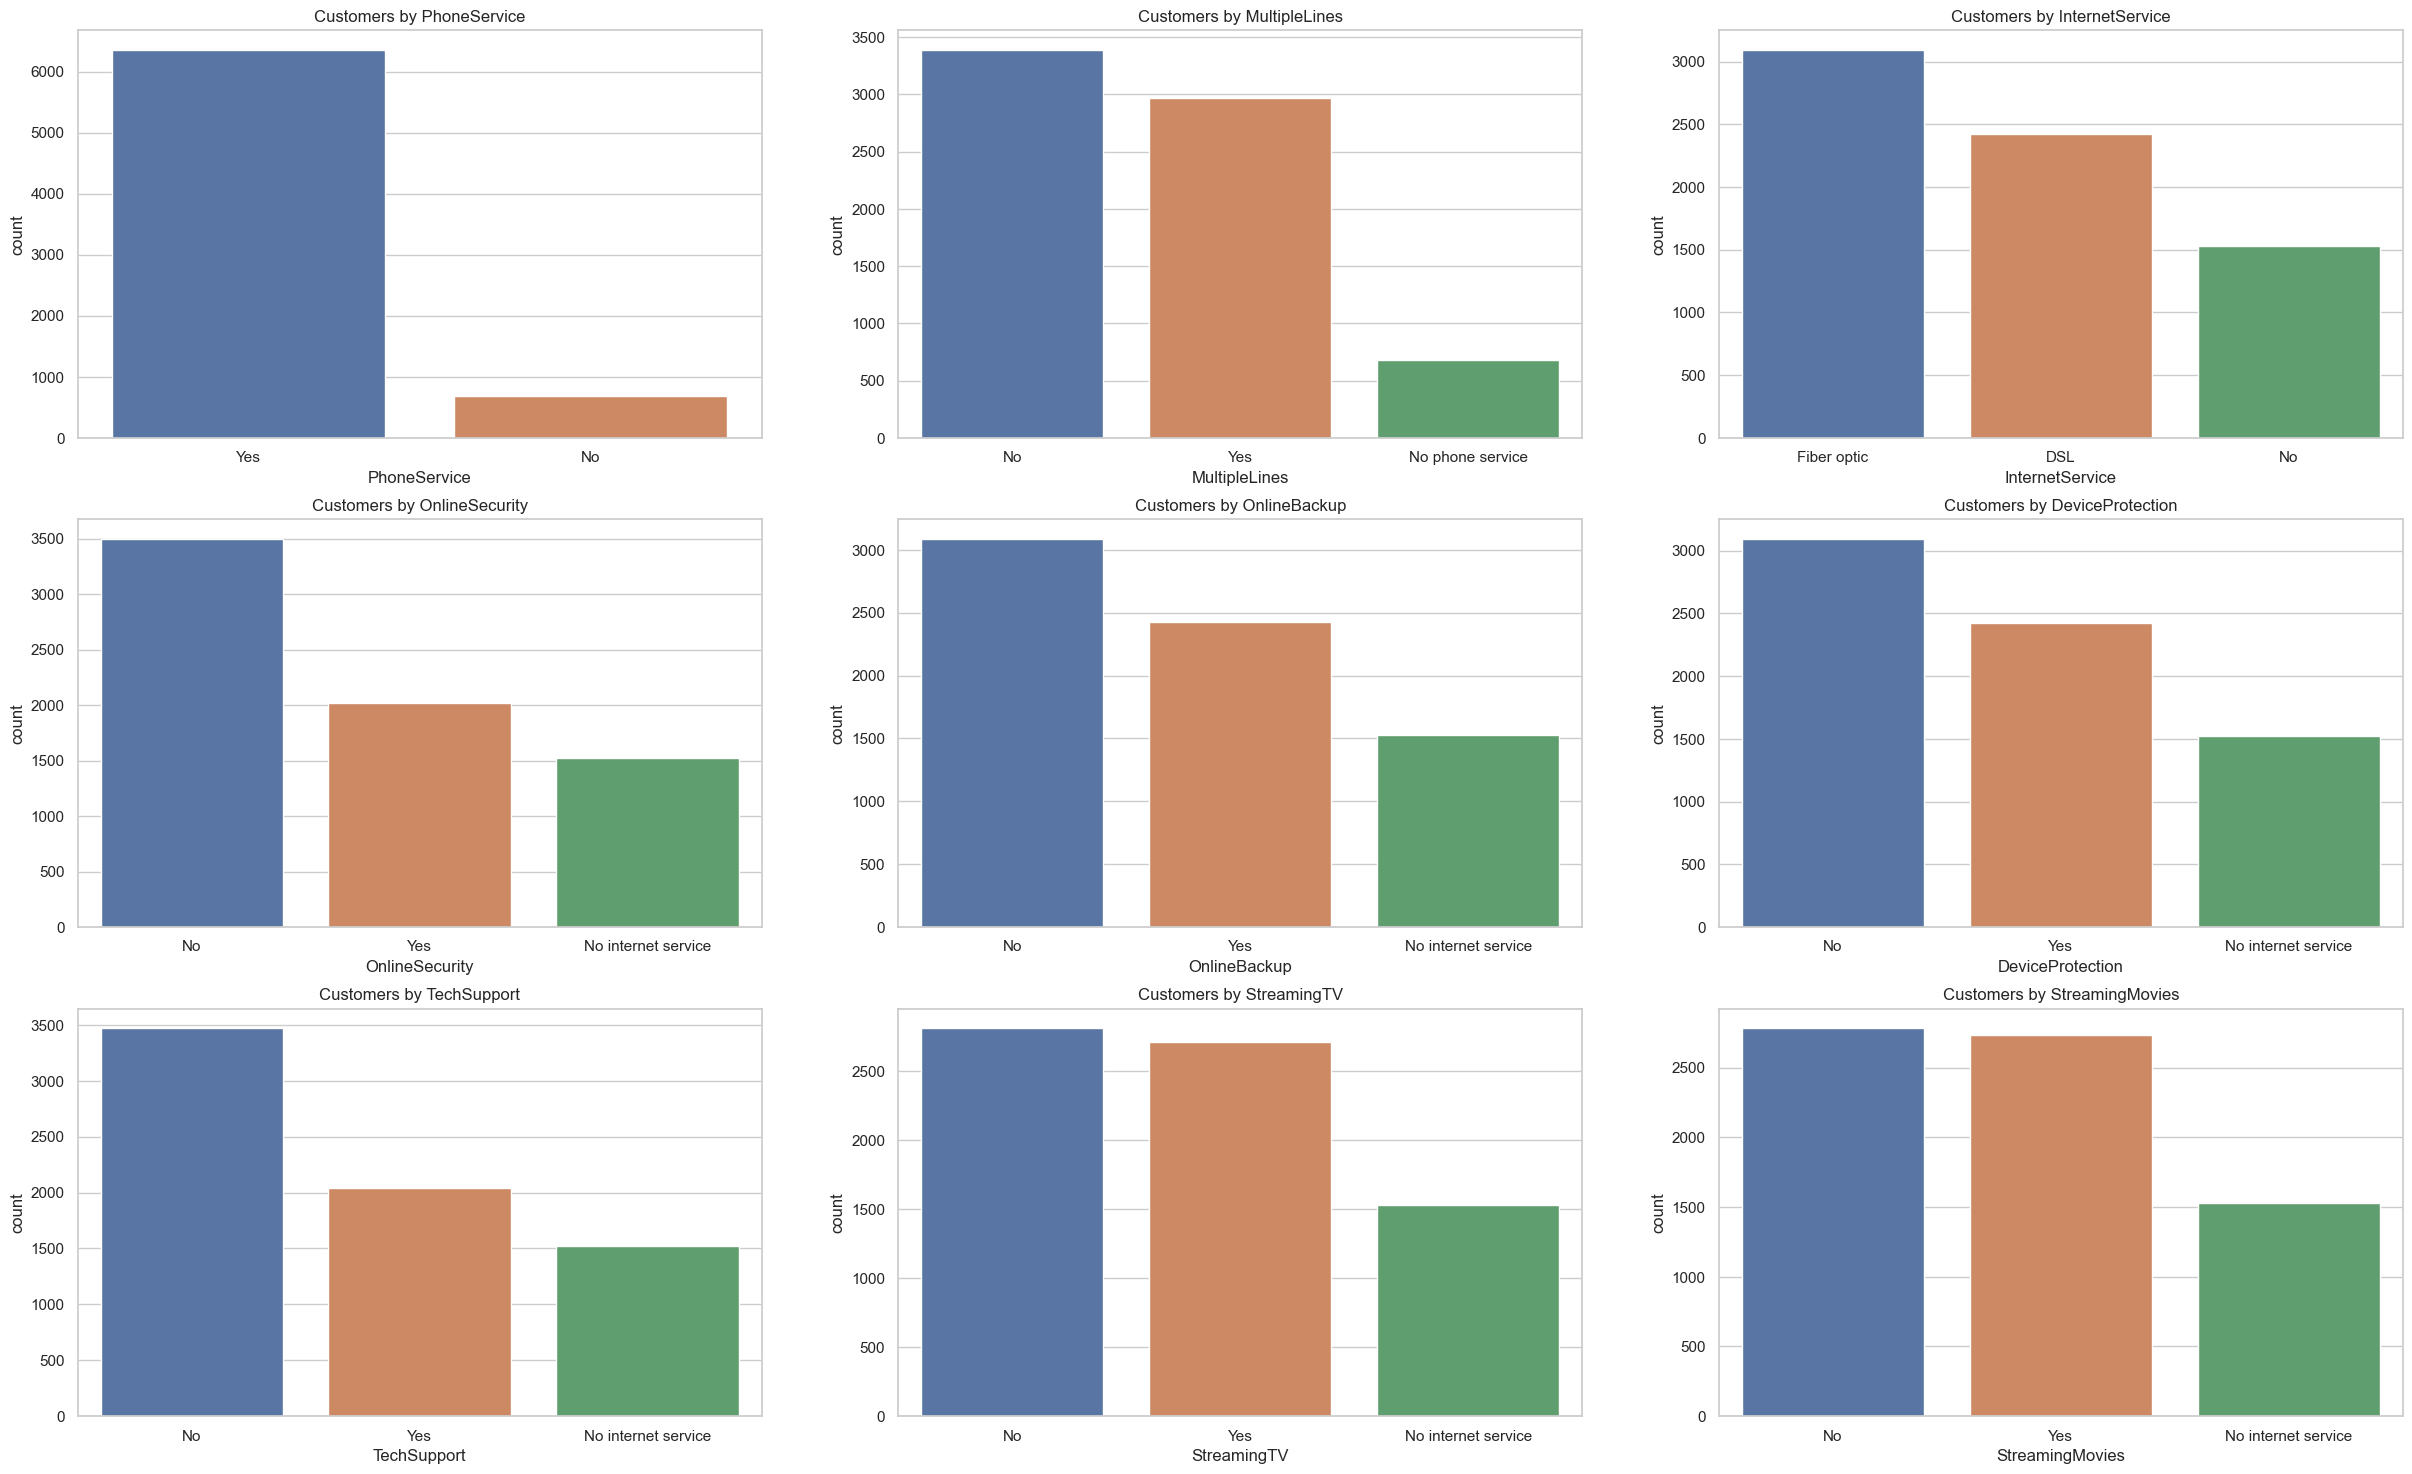

In [25]:
#Visualization for categorical columns

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(30,18))

ax = sb.countplot(data=data, x='PhoneService', order=data['PhoneService'].value_counts().index, ax=axs[0,0])
axs[0,0].set_title("Customers by PhoneService")

ax = sb.countplot(data=data, x='MultipleLines', order=data['MultipleLines'].value_counts().index, ax=axs[0,1])
axs[0,1].set_title("Customers by MultipleLines")

ax = sb.countplot(data=data, x='InternetService', order=data['InternetService'].value_counts().index, ax=axs[0,2])
axs[0,2].set_title("Customers by InternetService")

ax = sb.countplot(data=data, x='OnlineSecurity', order=data['OnlineSecurity'].value_counts().index, ax=axs[1,0])
axs[1,0].set_title("Customers by OnlineSecurity")

ax = sb.countplot(data=data, x='OnlineBackup', order=data['OnlineBackup'].value_counts().index, ax=axs[1,1])
axs[1,1].set_title("Customers by OnlineBackup")

ax = sb.countplot(data=data, x='DeviceProtection', order=data['DeviceProtection'].value_counts().index, ax=axs[1,2])
axs[1,2].set_title("Customers by DeviceProtection")

ax = sb.countplot(data=data, x='TechSupport', order=data['TechSupport'].value_counts().index, ax=axs[2,0])
axs[2,0].set_title("Customers by TechSupport")

ax = sb.countplot(data=data, x='StreamingTV', order=data['StreamingTV'].value_counts().index, ax=axs[2,1])
axs[2,1].set_title("Customers by StreamingTV")

ax = sb.countplot(data=data, x='StreamingMovies', order=data['StreamingMovies'].value_counts().index, ax=axs[2,2])
axs[2,2].set_title("Customers by StreamingMovies");

## Bivariate Analysis

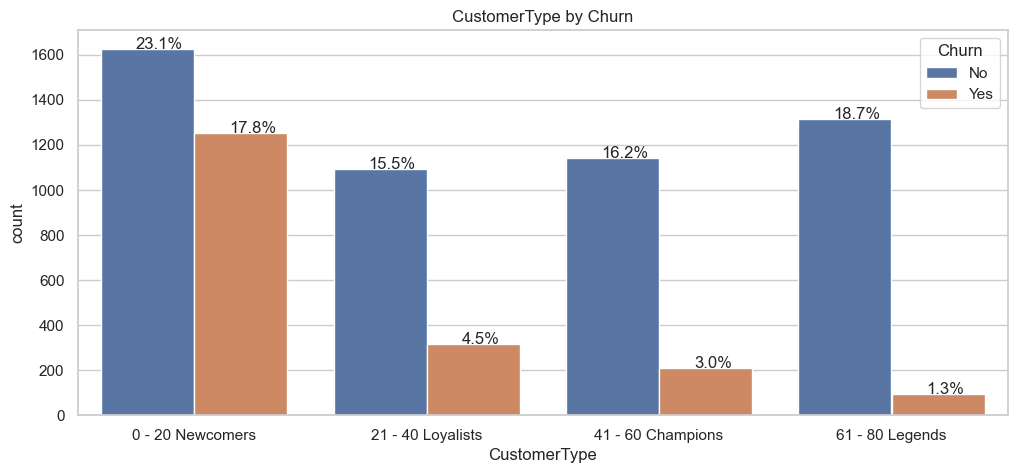

In [26]:
# CustomerType by Churn
sb.set_theme(style="whitegrid")
plt.figure(figsize=(12,5))
ax = sb.countplot(x="CustomerType", data=data, hue="Churn")
plt.title("CustomerType by Churn")
perc_plot(ax,data['Churn']);

### Observation:
Customers with the most churn are the Newcomers, which are the customers that joined ConnectTel between 0 - 20 months.
followed by the Loyalists, whcih are customer that joined ConnectTel within 21 - 40 months.

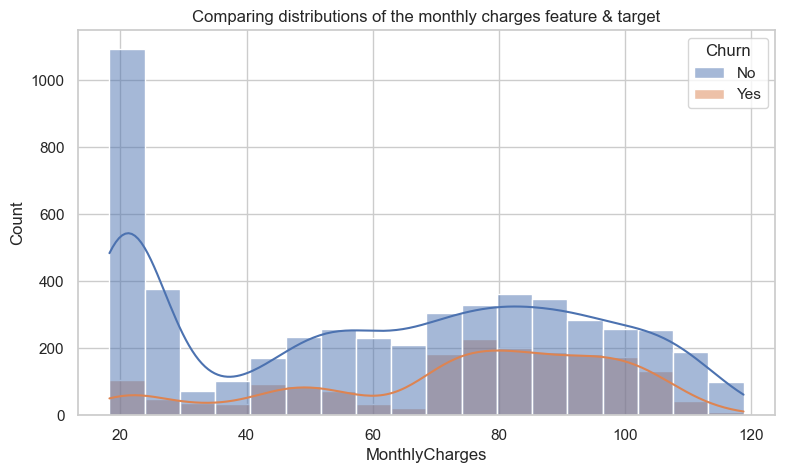

In [27]:
#comparing distributions of the monthly charges feature & target
plt.figure(figsize=(9,5))
sb.histplot(data=data, x="MonthlyCharges",hue="Churn",kde=True)
plt.title("Comparing distributions of the monthly charges feature & target");

### Observation:
- From the chart above, we see that customers with a very high churn rate are customers that pay monthly charges between 70 to 105. 
- Customers that pay monthly charges between 20 - 40 have a very low churn rate 

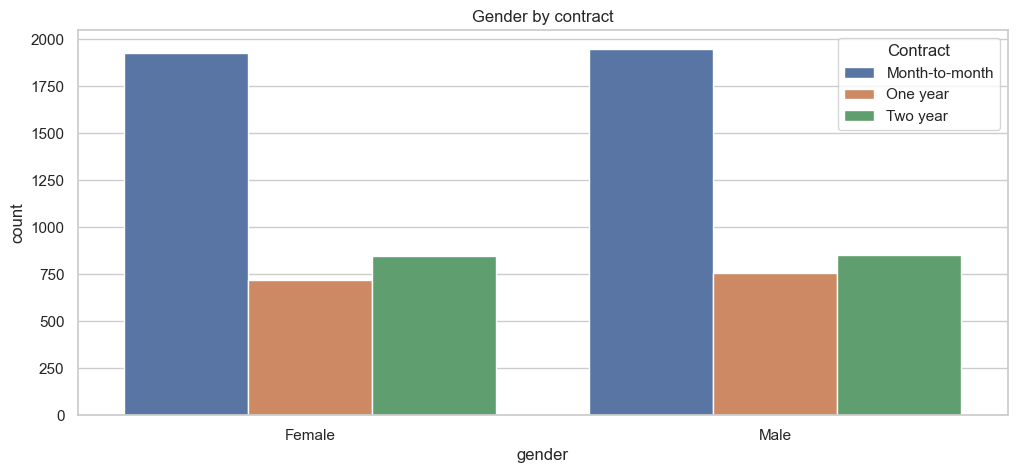

In [28]:
# Gender by contract

plt.figure(figsize=(12,5))
sb.countplot(x="gender", data=data, hue="Contract")
plt.title("Gender by contract");

### Observation:
Majority of ConnectTel male and female customers use the month-to-month contract followed by the tow year contract

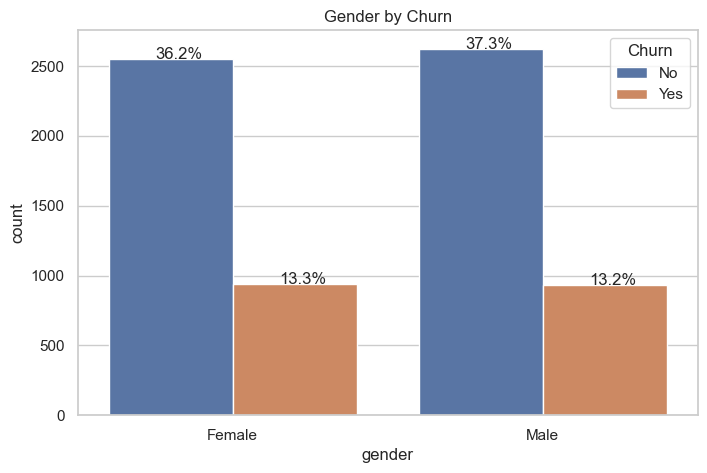

In [29]:
# Gender by churn
sb.set_theme(style="whitegrid")
plt.figure(figsize=(8,5))
ax = sb.countplot(x="gender", data=data, hue="Churn")
plt.title("Gender by Churn")
perc_plot(ax,data['Churn']);

### Observation
The female have slightly the most churn with 0.1% above the male gender

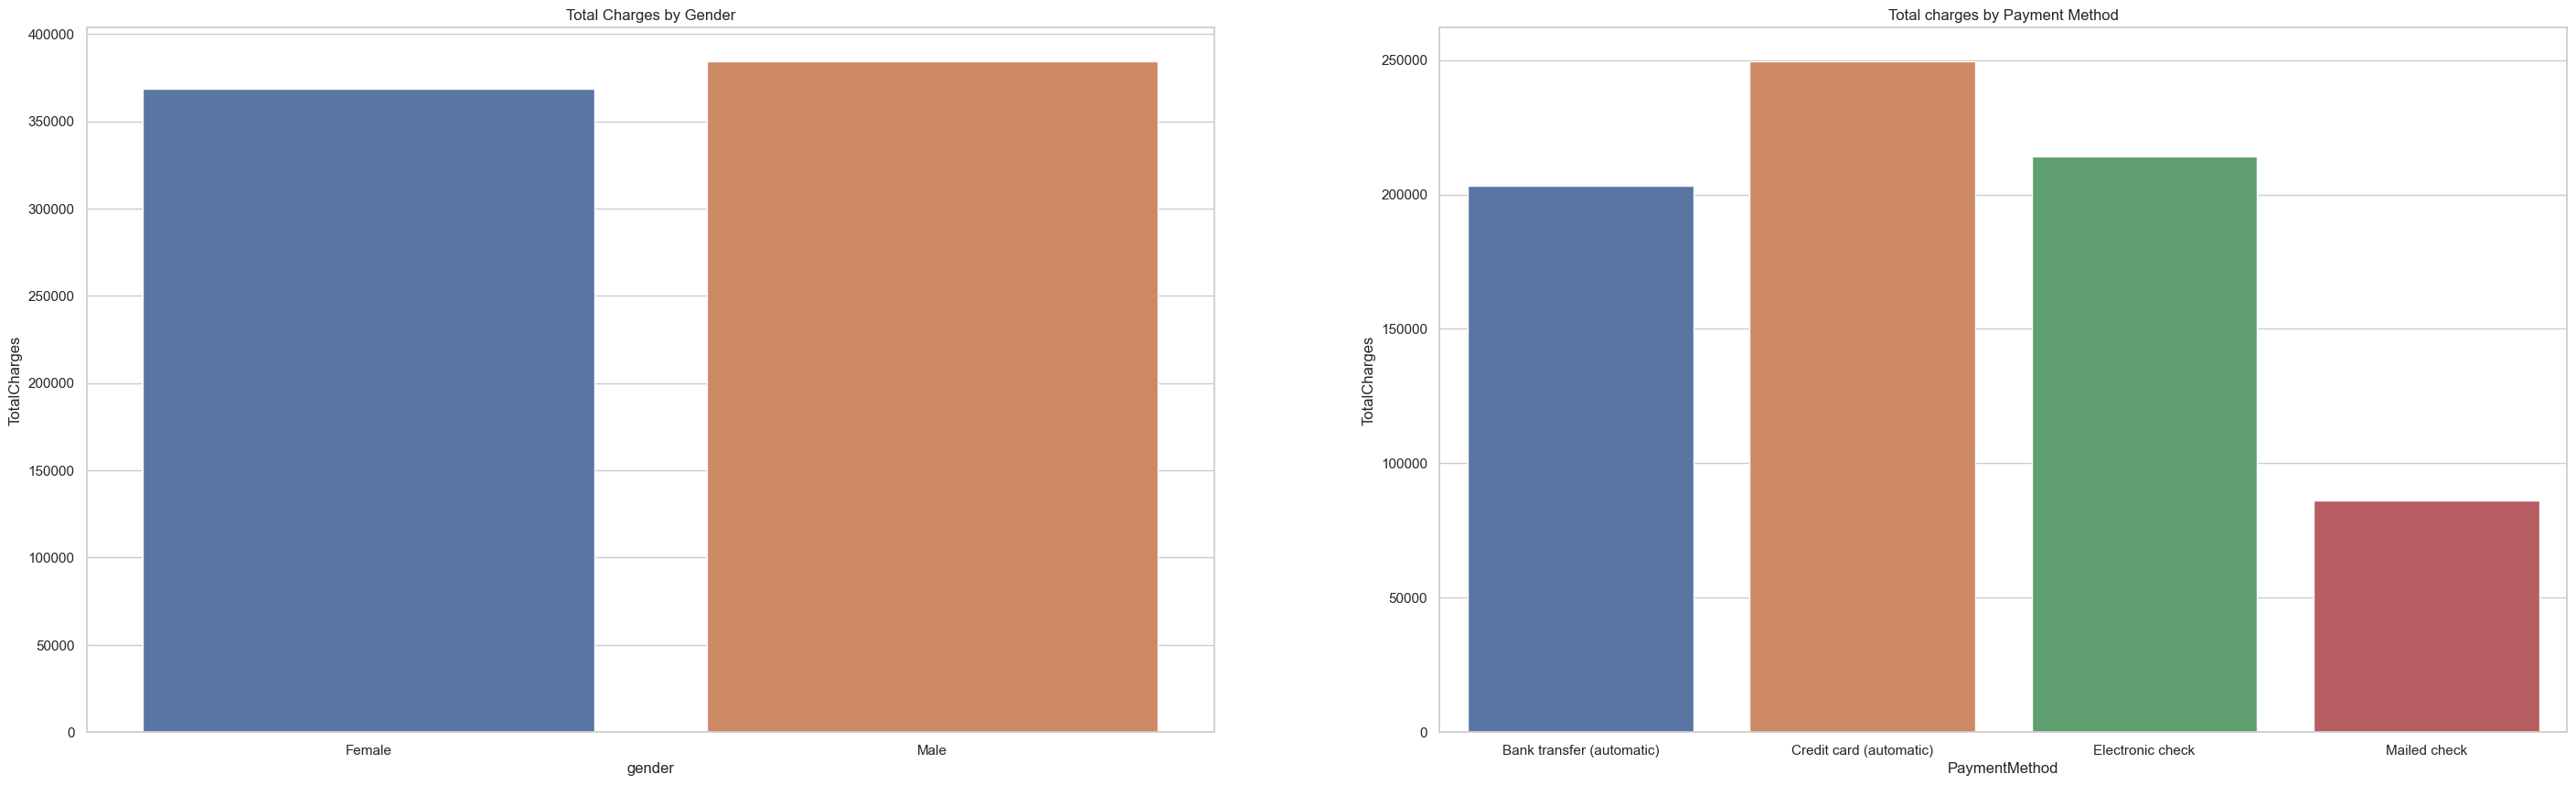

In [30]:
# Total charges by payment method and gender

fig, axs = plt.subplots(1,2, figsize=(35,10))

cust_gend = data.groupby("gender")["TotalCharges"].sum().reset_index()
sb.barplot(x="gender", data=cust_gend, y="TotalCharges", ax=axs[0])
axs[0].set_title("Total Charges by Gender")

sp_prof = data.groupby("PaymentMethod")["TotalCharges"].sum().reset_index()
sb.barplot(x="PaymentMethod", data=sp_prof, y="TotalCharges", ax=axs[1])
axs[1].set_title("Total charges by Payment Method");

### Observation:
- The first chart shows that the male gender paid the highest total charges.
- The second chart shows the payment method used to pay the highest charges, which is the credit card payment method. 

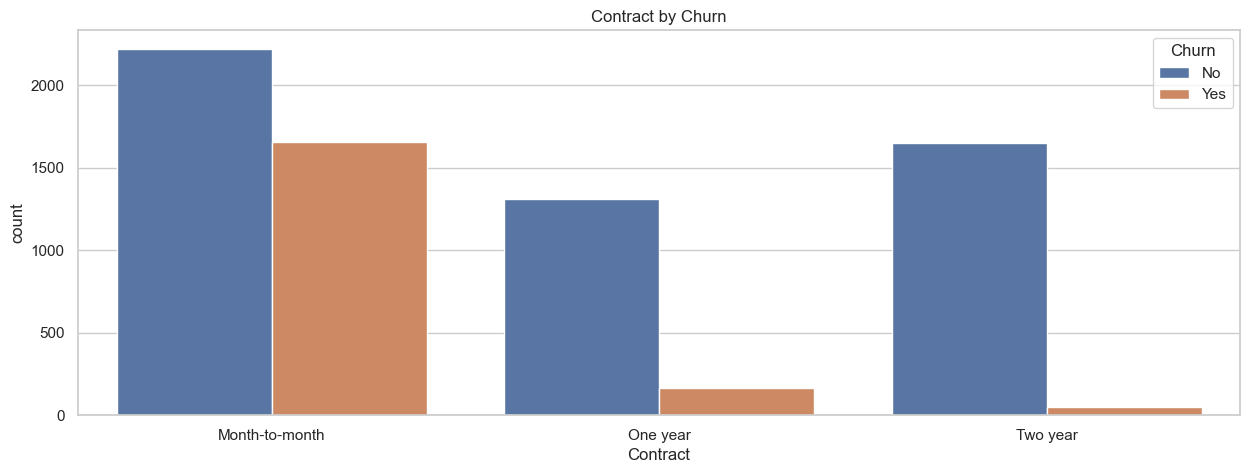

In [31]:
# Contract by churn analysis
plt.figure(figsize=(15,5))
sb.countplot(x="Contract", data=data, hue="Churn")
plt.title("Contract by Churn");

### Observation:
The customers with the most churn are the customers with the month-to-month contract 

In [64]:
data3 = data.drop(['SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'], axis=1)

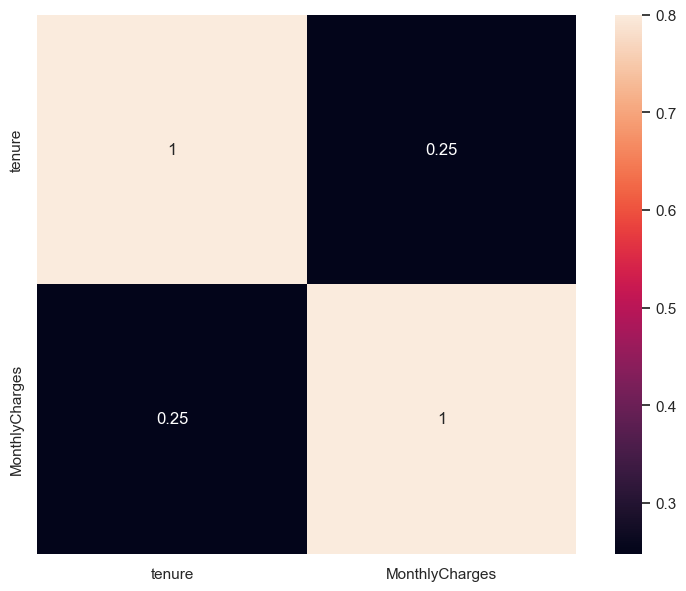

In [65]:
#Correlation

a = data3.corr()
plt.figure(figsize=(10,7))
sb.heatmap(a, vmax=.8, square=True, annot=True);

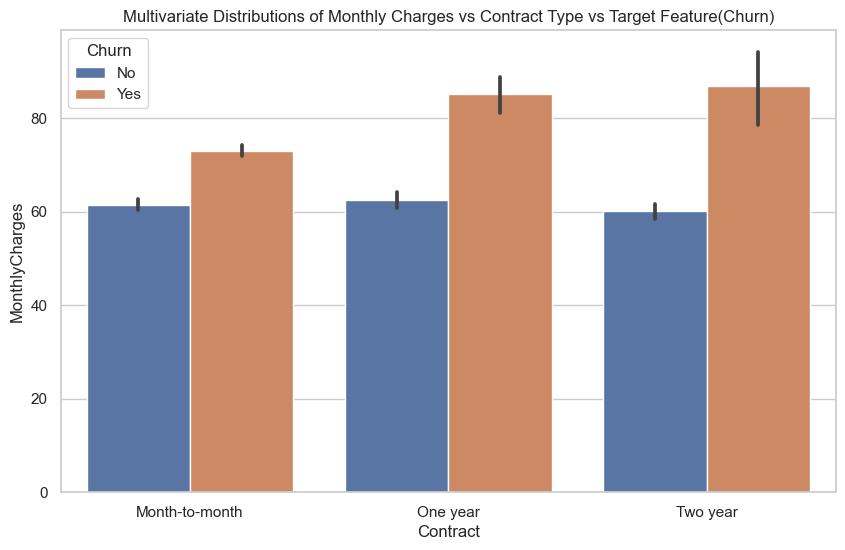

In [33]:
#multivariate distributions of monthly charges vs contract type vs target feature(Churn)
plt.figure(figsize = (10,6))
sb.barplot(y='MonthlyCharges',x='Contract',hue='Churn',data=data);
plt.title("Multivariate Distributions of Monthly Charges vs Contract Type vs Target Feature(Churn)");

### Observation:
- Customers with two year contract that pay above 80 monthly charges have high churn rate followed by customers with one year contract
- From the chart, we see that customer with monthly charges above 65, no matter the customer contract type, have a very high churn rate

# Feature engineering:
- Encoding categorical variables
- Create new features from existing features where necessary, depending on insights from your EDA

In [34]:
array_ = data.customerID.unique()
d = dict(enumerate(array_))
res = dict((v,k) for k,v in d.items())
data['newId'] = data['customerID'].map(res)

In [35]:
#segment our data into x dataset and target varaible
x = data.drop(['Churn', 'customerID'], axis=1)
target = data['Churn']

In [36]:
x.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,CustomerType,newId
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,0.0,0 - 20 Newcomers,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,0.0,21 - 40 Loyalists,1


In [37]:
#Encoding important categorical varibales
data2 = pd.get_dummies(x,columns=['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'CustomerType',])
data2.head()

,tenure,MonthlyCharges,TotalCharges,newId,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,...,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,CustomerType_0 - 20 Newcomers,CustomerType_21 - 40 Loyalists,CustomerType_41 - 60 Champions,CustomerType_61 - 80 Legends
0,1,29.85,0.0,0,1,0,1,0,0,1,...,0,1,0,0,1,0,1,0,0,0
1,34,56.95,0.0,1,0,1,1,0,1,0,...,1,0,0,0,0,1,0,1,0,0
2,2,53.85,0.0,2,0,1,1,0,1,0,...,0,1,0,0,0,1,1,0,0,0
3,45,42.30,0.0,3,0,1,1,0,1,0,...,1,0,1,0,0,0,0,0,1,0
4,2,70.70,0.0,4,1,0,1,0,1,0,...,0,1,0,0,1,0,1,0,0,0


# Model Selection and Training

In [38]:
#Scaling dataset
from sklearn.preprocessing import MinMaxScaler

#Instanstiate our scaler
scaler = MinMaxScaler()

scaled_data = scaler.fit_transform(data2)
#scaled_data

In [39]:
#Split dataset into training and validaion set (test)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scaled_data, target, test_size=0.33, random_state=42)

In [40]:
X_train.shape

(4718, 51)

### The 3 supervised learning model we will be using to train and test are:
1. Logistic Regression
2. Random Forest
3. Decision Trees

In [41]:
#Building a base model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [42]:
#Instantiating our classifier models / Represent as...
lr_mod = LogisticRegression()
rfc_mod = RandomForestClassifier()
dt_mod = DecisionTreeClassifier()

#Fitting and training our classifier models
lr_mod.fit(X_train, y_train)
rfc_mod.fit(X_train, y_train)
dt_mod.fit(X_train, y_train)

DecisionTreeClassifier()

In [43]:
#Creating predictions

pred_lr = lr_mod.predict(X_test)
pred_rfc = rfc_mod.predict(X_test)
pred_dt = dt_mod.predict(X_test)

### Model Evaluation

In [44]:
lr_score = lr_mod.score(X_test, y_test)
rfc_score = rfc_mod.score(X_test, y_test)
dt_score = dt_mod.score(X_test, y_test)

print(f"Model accuracy score for Logistic Regression is {lr_score}")
print(f"Model accuracy score for RandomForestClassifier is {rfc_score}")
print(f"Model accuracy score for  DecisionTreeClassifier is {dt_score}")

Model accuracy score for Logistic Regression is 0.8141935483870968
Model accuracy score for RandomForestClassifier is 0.8004301075268817
Model accuracy score for  DecisionTreeClassifier is 0.7161290322580646


### Analyzing the results of trained model

In [45]:
#Model Evaluating Using Metrics
from sklearn.metrics import classification_report,confusion_matrix

In [46]:
#classfication report for logistic regression

print(f"Model accuracy score for Logistic Regression is: {lr_score}\n")
print("Logistic Regression Model report: \n", classification_report(y_test,pred_lr))

Model accuracy score for Logistic Regression is: 0.8141935483870968

Logistic Regression Model report: 
               precision    recall  f1-score   support

          No       0.85      0.91      0.88      1697
         Yes       0.69      0.57      0.62       628

    accuracy                           0.81      2325
   macro avg       0.77      0.74      0.75      2325
weighted avg       0.81      0.81      0.81      2325



In [47]:
# helpful function to plot out a confussion matrix

def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sb.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

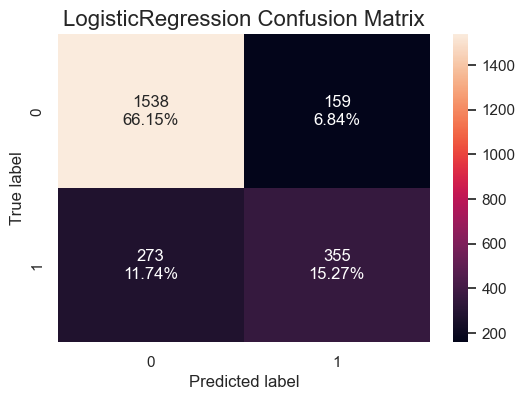

In [48]:
confusion_matrix_sklearn(lr_mod,X_test, y_test)
plt.title("LogisticRegression Confusion Matrix", fontsize=16);

In [49]:
#classfication report for Random Forest

print(f"Model accuracy score for Random Forest is: {rfc_score}\n")
print("Random Forest Model report: \n", classification_report(y_test,pred_rfc))

Model accuracy score for Random Forest is: 0.8004301075268817

Random Forest Model report: 
               precision    recall  f1-score   support

          No       0.83      0.91      0.87      1697
         Yes       0.67      0.51      0.58       628

    accuracy                           0.80      2325
   macro avg       0.75      0.71      0.72      2325
weighted avg       0.79      0.80      0.79      2325



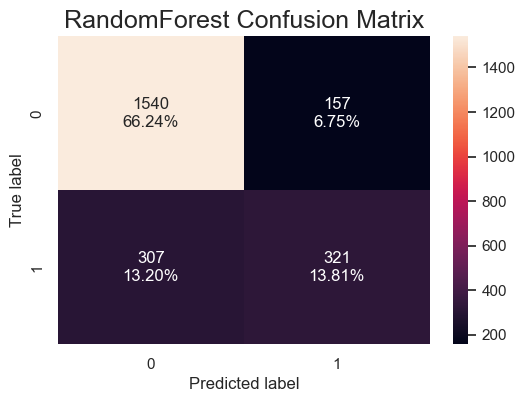

In [50]:
confusion_matrix_sklearn(rfc_mod,X_test, y_test)
plt.title("RandomForest Confusion Matrix", fontsize=18);

In [51]:
#classfication report for Decision Trees

print(f"Model accuracy score for Decision Trees is: {dt_score}\n")
print("Decision Trees Model report: \n", classification_report(y_test,pred_dt))

Model accuracy score for Decision Trees is: 0.7161290322580646

Decision Trees Model report: 
               precision    recall  f1-score   support

          No       0.81      0.80      0.80      1697
         Yes       0.48      0.49      0.48       628

    accuracy                           0.72      2325
   macro avg       0.64      0.65      0.64      2325
weighted avg       0.72      0.72      0.72      2325



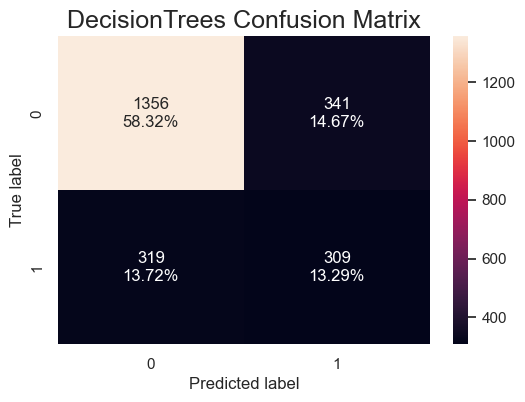

In [52]:
confusion_matrix_sklearn(dt_mod,X_test, y_test)
plt.title("DecisionTrees Confusion Matrix", fontsize=18);

## What metrics are most important for the problem?
The metrics that are most important for the problem are Logistic Regression and Random Forest.
#### Logistic Regression:
- Accuracy: 0.81
- Precision (Yes class): 0.69
- Recall (Yes class): 0.57
- F1-score (Yes class): 0.62

#### Random Forest:
- Accuracy: 0.80
- Precision (Yes class): 0.65
- Recall (Yes class): 0.50
- F1-score (Yes class): 0.56

With Logisitic Regression and Random Forest having an accuracy of 0.814 and 0.8 and precision of 0.69 and 0.67 respectively, these metrics have high-ability to correctly identify positive instances. A higher precision means fewer false positives.

### Should the business be more concerned with better results on false negatives or true positives?

The business should generally be more concerned with better results on true positives.
#### Here is why:

- False Negatives: If we fail to identify customers who are at risk of churning, the business could lose those customers, resulting in revenue loss and potential damage to the business.

It's crucial to prioritize true positives (identifying customers at risk of churn) while maintaining a balance between precision and recall.